## Data Import and Modules

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
pd.set_option('display.max_columns', None)

In [3]:

path_train = r"C:\Users\felix\Kaggle Challenges\Store Sales\train.csv"

path_oil = r"C:\Users\felix\Kaggle Challenges\Store Sales\oil.csv"

path_stores = r"C:\Users\felix\Kaggle Challenges\Store Sales\stores.csv"

path_holidays = r"C:\Users\felix\Kaggle Challenges\Store Sales\holidays_events.csv"

path_test = r"C:\Users\felix\Kaggle Challenges\Store Sales\test.csv"

df_train = pd.read_csv(path_train)

df_oil = pd.read_csv(path_oil)

df_stores = pd.read_csv(path_stores)

df_holidays = pd.read_csv(path_holidays)

df_test = pd.read_csv(path_test)

Interesting reads: <br>
https://miykael.github.io/blog/2022/advanced_eda/

In [4]:
df_train.head(15)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [5]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
df_holidays[df_holidays["type"] == "Work Day"]

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


## Data Investigation

In order to conduct a thorough EDA, we will at first join all dataframes into one

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [10]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [11]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [12]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [13]:
df_train.shape

(3000888, 6)

In order to be able to conduct a thorough feature engineering, we will join test and training data, and mutate the sales feature with nans for the test data, we can later use that as a filter criteria to seperate the two before training again.

In [14]:
df_test["sales"] = np.nan

In [15]:
df_test.head()

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN
1,3000889,2017-08-16,1,BABY CARE,0,NaN
2,3000890,2017-08-16,1,BEAUTY,2,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,NaN
4,3000892,2017-08-16,1,BOOKS,0,NaN


In [16]:
frames = [df_train, df_test]

df_train = pd.concat(frames)

In [17]:
df_train.shape

(3029400, 6)

In [18]:
df_train.date = df_train.date.astype("datetime64[ns]")

df_oil.date = df_oil.date.astype("datetime64[ns]")

In [19]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [20]:
df_train = df_train.merge(df_oil, how = "left", on="date")

df_train[df_train["date"] != "2013-01-01"]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,93.14
1783,1783,2013-01-02,1,BABY CARE,0.0,0,93.14
1784,1784,2013-01-02,1,BEAUTY,2.0,0,93.14
1785,1785,2013-01-02,1,BEVERAGES,1091.0,0,93.14
1786,1786,2013-01-02,1,BOOKS,0.0,0,93.14
...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,47.26
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26


In [21]:
df_train.shape

(3029400, 7)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 3029399
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 184.9+ MB


In [23]:
df_train = df_train.merge(df_stores, how = "left", on= "store_nbr")

In [24]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


In [25]:
df_train.shape

(3029400, 11)

In [26]:
df_holidays.date = df_holidays.date.astype("datetime64[ns]")

In [27]:
df_train = df_train.merge(df_holidays, how = "left", on="date")

In [28]:
df_train.shape

(3082860, 16)

In [29]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [30]:
#renaming of columns

df_train.rename(columns = {"type_x":"store_type", "type_y":"day_type"}, inplace=True)

df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


Now that all dataframes are joined together into one, we can dive deeper into the analysis

## Investigate Structure

In [31]:
print(f"We have the total amount of columns and rows available {df_train.shape}")

We have the total amount of columns and rows available (3082860, 16)


In [32]:
pd.value_counts(df_train.dtypes)

object            9
int64             4
float64           2
datetime64[ns]    1
dtype: int64

In [33]:
# evaluation of categorical features

df_train.select_dtypes(exclude = ["number", "datetime64[ns]"]).head()

,family,city,state,store_type,day_type,locale,locale_name,description,transferred
0,AUTOMOTIVE,Quito,Pichincha,D,Holiday,National,Ecuador,Primer dia del ano,False
1,BABY CARE,Quito,Pichincha,D,Holiday,National,Ecuador,Primer dia del ano,False
2,BEAUTY,Quito,Pichincha,D,Holiday,National,Ecuador,Primer dia del ano,False
3,BEVERAGES,Quito,Pichincha,D,Holiday,National,Ecuador,Primer dia del ano,False
4,BOOKS,Quito,Pichincha,D,Holiday,National,Ecuador,Primer dia del ano,False


In [34]:
df_train.select_dtypes(exclude = ["number", "datetime64[ns]"]).describe()

,family,city,state,store_type,day_type,locale,locale_name,description,transferred
count,3082860,3082860,3082860,3082860,504306,504306,504306,504306,504306
unique,33,22,16,5,6,3,24,101,2
top,AUTOMOTIVE,Quito,Pichincha,D,Holiday,National,Ecuador,Carnaval,False
freq,93420,1027620,1084710,1027620,306504,261954,261954,17820,488268


In [35]:
df_train.select_dtypes(exclude="object").head()

,id,date,store_nbr,sales,onpromotion,dcoilwtico,cluster
0,0,2013-01-01,1,0.0,0,NaN,13
1,1,2013-01-01,1,0.0,0,NaN,13
2,2,2013-01-01,1,0.0,0,NaN,13
3,3,2013-01-01,1,0.0,0,NaN,13
4,4,2013-01-01,1,0.0,0,NaN,13


In [36]:
df_train.select_dtypes(exclude = ["number", "datetime64[ns]"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   family       object
 1   city         object
 2   state        object
 3   store_type   object
 4   day_type     object
 5   locale       object
 6   locale_name  object
 7   description  object
 8   transferred  object
dtypes: object(9)
memory usage: 235.2+ MB


In [37]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
 7   city         object        
 8   state        object        
 9   store_type   object        
 10  cluster      int64         
 11  day_type     object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 399.8+ MB


The non-numerical features seem to be fine and wont need further data cleaning

In [39]:
df_train.select_dtypes(exclude="object").describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.082860e+06,3.082860e+06,3.054348e+06,3.082860e+06,2.120580e+06,3.082860e+06
mean,1.518250e+06,2.750000e+01,3.590209e+02,2.657692e+00,6.780640e+01,8.481481e+00
std,8.742912e+05,1.558579e+01,1.107286e+03,1.236626e+01,2.564571e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.618048e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.646000e+01,4.000000e+00
50%,1.521828e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.325000e+01,8.500000e+00
75%,2.272940e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.572000e+01,1.300000e+01
max,3.029399e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


In [40]:
df_train.select_dtypes(exclude="object").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   sales        float64       
 4   onpromotion  int64         
 5   dcoilwtico   float64       
 6   cluster      int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 188.2 MB


Same goes for the the numerical features, with the exception of missing-values for the oil prices

## Data Quality  

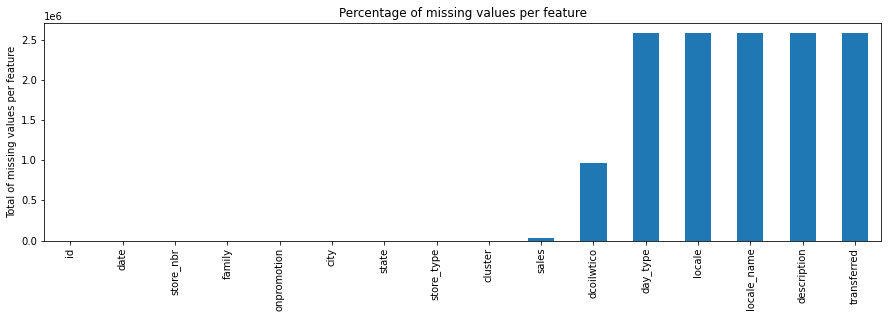

In [41]:
df_train.isna().sum().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Total of missing values per feature");

We can disregard the missing values for sales data, since it's related to the test data

### Oil Interpolation

The easiest solution for replacing the missing oil prices would be to find a way to look up the oil prices and replace them with the actual ones, in this case, however, we will interpolate them.

In [42]:
# dates with missing values

df_train[df_train["dcoilwtico"].isna()].groupby("date")["date"].count()

date
2013-01-01    1782
2013-01-05    1782
2013-01-06    1782
2013-01-12    1782
2013-01-13    1782
              ... 
2017-08-13    1782
2017-08-19    1782
2017-08-20    1782
2017-08-26    1782
2017-08-27    1782
Name: date, Length: 525, dtype: int64

<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

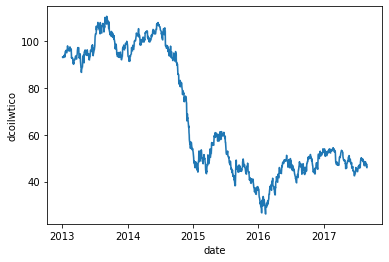

In [43]:
sns.lineplot(y=df_train["dcoilwtico"], x= df_train["date"])

In [44]:
#Imputation of oil prices using polynomial imputation

df_sub = df_train[["date", "dcoilwtico"]]

In [45]:
df_sub["dcoilwtico"].interpolate(method="bfill", limit_direction="backward" ,degree=3, inplace=True)

C:\Users\felix\anaconda3\lib\site-packages\pandas\core\generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='date', ylabel='dcoilwtico'>

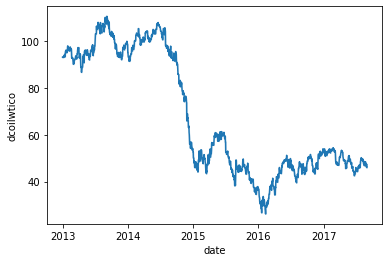

In [46]:
sns.lineplot(y=df_sub["dcoilwtico"], x= df_sub["date"])

In [47]:
df_sub["dcoilwtico"].isna().sum()

0

We will continue by using the interpolated values for the dataframe

In [48]:
df_train["dcoilwtico"] = df_sub["dcoilwtico"]

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
 7   city         object        
 8   state        object        
 9   store_type   object        
 10  cluster      int64         
 11  day_type     object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 399.8+ MB


### Imputation rest of nans

In [50]:
days_na = df_train[(df_train["day_type"].isna()) & 
                   (df_train["locale"].isna()) & 
                   (df_train["locale_name"].isna()) & 
                   (df_train["description"].isna()) & 
                   (df_train["transferred"].isna())]["date"].unique()

I assume that all nans are days on which there is no holiday

In [51]:
for day in days_na:
    if day in df_holidays["date"].unique():
        print("Found")
        break
    else:
        continue
print("Nothing present")

Nothing present


As we can see through our little experiment, that all nans are non-holiday-days. As such we will populate the nans with a placeholder to indicate the holiday days.

In [52]:
df_train["day_type"].replace(to_replace=np.nan, value="Work Day", inplace = True)

In [53]:
df_train["day_type"].isna().sum()

0

In [54]:
df_train["locale"].replace(to_replace=np.nan, value="No Holiday", inplace = True)

df_train["locale_name"].replace(to_replace=np.nan, value="No Holiday", inplace = True)

df_train["description"].replace(to_replace=np.nan, value="No Holiday", inplace = True)

df_train["transferred"].replace(to_replace=np.nan, value=False, inplace = True)

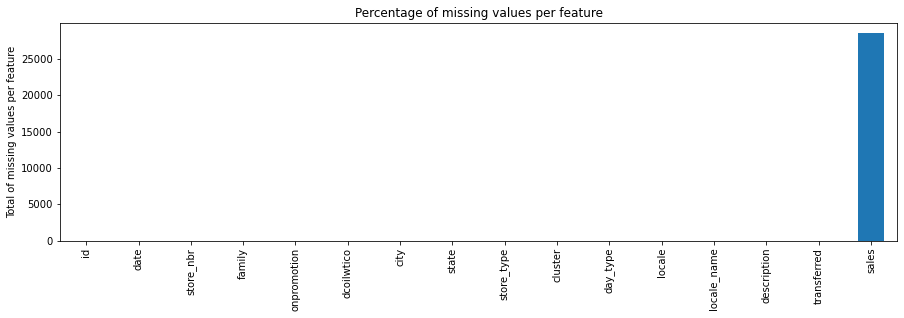

In [55]:
df_train.isna().sum().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Total of missing values per feature");

As we can see, we have succesfully removed all nans on non-holiday days.

In [56]:
df_train[df_train["locale"] == "No Holiday"]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,93.14,Quito,Pichincha,D,13,Work Day,No Holiday,No Holiday,No Holiday,False
1783,1783,2013-01-02,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Work Day,No Holiday,No Holiday,No Holiday,False
1784,1784,2013-01-02,1,BEAUTY,2.0,0,93.14,Quito,Pichincha,D,13,Work Day,No Holiday,No Holiday,No Holiday,False
1785,1785,2013-01-02,1,BEVERAGES,1091.0,0,93.14,Quito,Pichincha,D,13,Work Day,No Holiday,No Holiday,No Holiday,False
1786,1786,2013-01-02,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Work Day,No Holiday,No Holiday,No Holiday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False


## EDA

### Data Exploration - Sales by Store

#### Stores

We continue to investigate the feature store - nbrs

In [57]:
# total stores that exist

df_train["store_nbr"].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [58]:
store_sales = df_train.groupby("store_nbr")["sales"].agg("sum").sort_values().reset_index()

store_sales.head()

,store_nbr,sales
0,52,2.764970e+06
1,22,4.201150e+06
2,32,6.070115e+06
3,30,7.538101e+06
4,35,7.822669e+06


<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

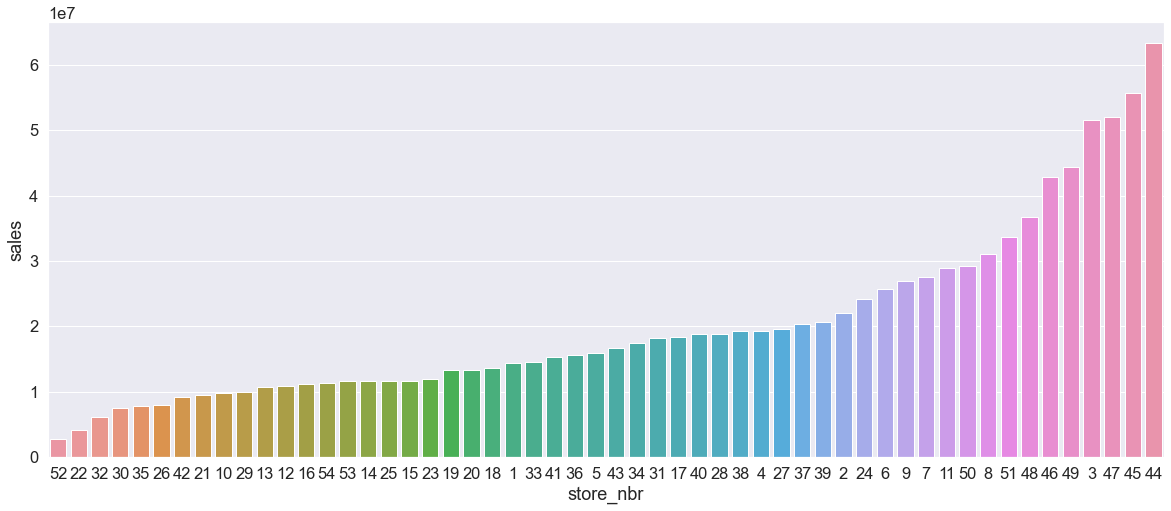

In [59]:
plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)

sns.barplot(y=store_sales["sales"], x=store_sales["store_nbr"], order = store_sales["store_nbr"])

We can deduct that the stores 44, 45, 47, 3 and 49 ar ethe most successful ones. We now evaluate the store types and clusters, we will therefore rename one column.

#### Store Types

C:\Users\felix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='store_type', ylabel='count'>

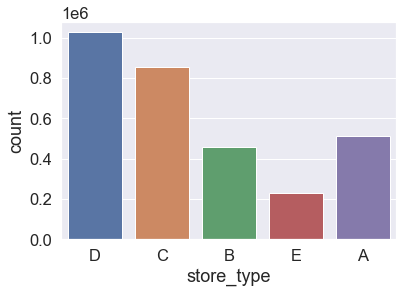

In [60]:
sns.countplot(df_train["store_type"])

C:\Users\felix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


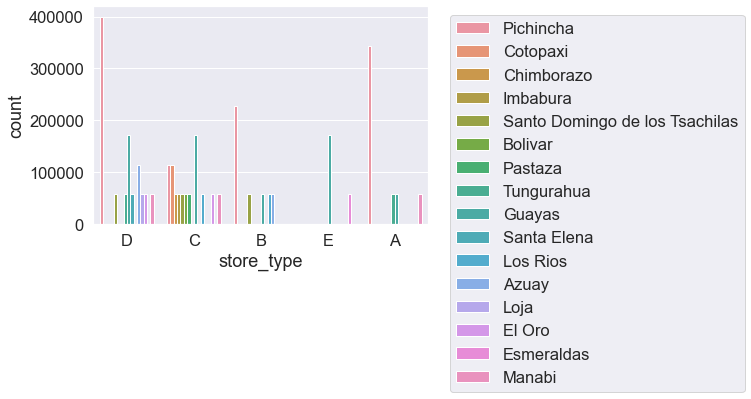

In [61]:
sns.countplot(df_train["store_type"], hue=df_train["state"])

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

We can see that the store types D, C are the most present. In addition, we can observe that store types A, B, and D are mostly present in Pichincha.

<AxesSubplot:xlabel='store_type', ylabel='sales'>

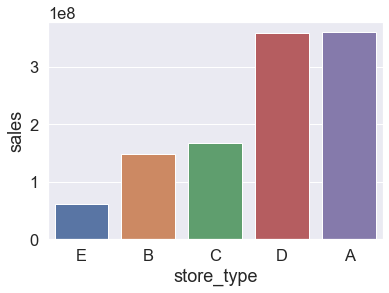

In [62]:
df_type = df_train.groupby("store_type")["sales"].agg("sum").sort_values().reset_index()

sns.barplot(y=df_type["sales"], x=df_type["store_type"], order = df_type["store_type"])

We can also see that the store types A and D have the highest sales

#### Store Cluster

We continue to investigate the store clusters

C:\Users\felix\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cluster', ylabel='count'>

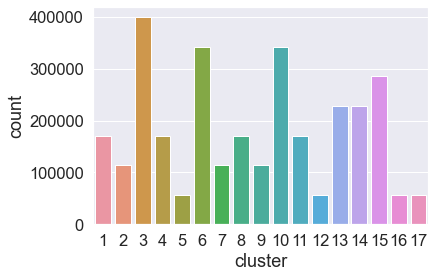

In [63]:
sns.countplot(df_train["cluster"])

We can see that some of the clusters are more present than others (f.e. 3, 6, 10)

<AxesSubplot:xlabel='cluster', ylabel='sales'>

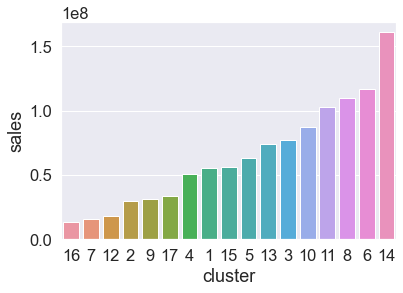

In [64]:
df_clus = df_train.groupby("cluster")["sales"].agg("sum").sort_values().reset_index()

sns.barplot(y=df_clus["sales"], x=df_clus["cluster"], order = df_clus["cluster"])

Interestingly, cluster 14 has by far the highest sales

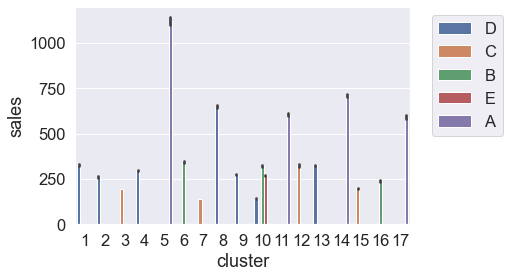

In [65]:
sns.barplot(y= df_train["sales"], x=df_train["cluster"], hue=df_train["store_type"])

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#### Family 

[Text(0, 0, 'BOOKS'),
 Text(1, 0, 'BABY CARE'),
 Text(2, 0, 'HOME APPLIANCES'),
 Text(3, 0, 'HARDWARE'),
 Text(4, 0, 'MAGAZINES'),
 Text(5, 0, 'SCHOOL AND OFFICE SUPPLIES'),
 Text(6, 0, 'BEAUTY'),
 Text(7, 0, 'PET SUPPLIES'),
 Text(8, 0, 'LAWN AND GARDEN'),
 Text(9, 0, 'AUTOMOTIVE'),
 Text(10, 0, 'PLAYERS AND ELECTRONICS'),
 Text(11, 0, 'LINGERIE'),
 Text(12, 0, 'LADIESWEAR'),
 Text(13, 0, 'CELEBRATION'),
 Text(14, 0, 'HOME AND KITCHEN II'),
 Text(15, 0, 'HOME AND KITCHEN I'),
 Text(16, 0, 'GROCERY II'),
 Text(17, 0, 'SEAFOOD'),
 Text(18, 0, 'LIQUOR,WINE,BEER'),
 Text(19, 0, 'PREPARED FOODS'),
 Text(20, 0, 'FROZEN FOODS'),
 Text(21, 0, 'EGGS'),
 Text(22, 0, 'HOME CARE'),
 Text(23, 0, 'DELI'),
 Text(24, 0, 'PERSONAL CARE'),
 Text(25, 0, 'MEATS'),
 Text(26, 0, 'POULTRY'),
 Text(27, 0, 'BREAD/BAKERY'),
 Text(28, 0, 'DAIRY'),
 Text(29, 0, 'CLEANING'),
 Text(30, 0, 'PRODUCE'),
 Text(31, 0, 'BEVERAGES'),
 Text(32, 0, 'GROCERY I')]

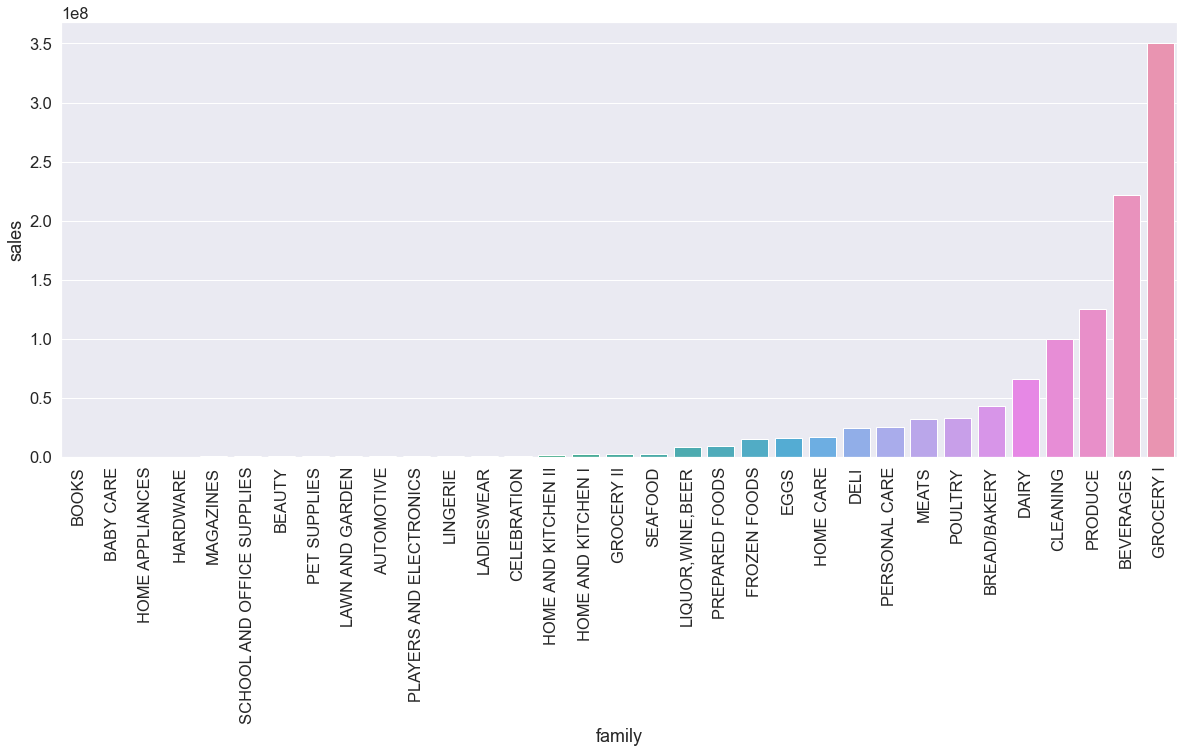

In [66]:
df_fam = df_train.groupby("family")["sales"].agg("sum").sort_values().reset_index()

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)

ax = sns.barplot(y=df_fam["sales"], x=df_fam["family"], order = df_fam["family"])

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

We can observe that spending for Groceries, beverages, produce and cleaning are by far the highest ones

### Data Exploration - Sales by Region

In [67]:
df_reg = df_train[["sales","city"]]

df_reg.head()

,sales,city
0,0.0,Quito
1,0.0,Quito
2,0.0,Quito
3,0.0,Quito
4,0.0,Quito


[Text(0, 0, 'Puyo'),
 Text(1, 0, 'Playas'),
 Text(2, 0, 'El Carmen'),
 Text(3, 0, 'Riobamba'),
 Text(4, 0, 'Salinas'),
 Text(5, 0, 'Ibarra'),
 Text(6, 0, 'Guaranda'),
 Text(7, 0, 'Manta'),
 Text(8, 0, 'Quevedo'),
 Text(9, 0, 'Libertad'),
 Text(10, 0, 'Esmeraldas'),
 Text(11, 0, 'Babahoyo'),
 Text(12, 0, 'Loja'),
 Text(13, 0, 'Daule'),
 Text(14, 0, 'Latacunga'),
 Text(15, 0, 'Cayambe'),
 Text(16, 0, 'Machala'),
 Text(17, 0, 'Santo Domingo'),
 Text(18, 0, 'Ambato'),
 Text(19, 0, 'Cuenca'),
 Text(20, 0, 'Guayaquil'),
 Text(21, 0, 'Quito')]

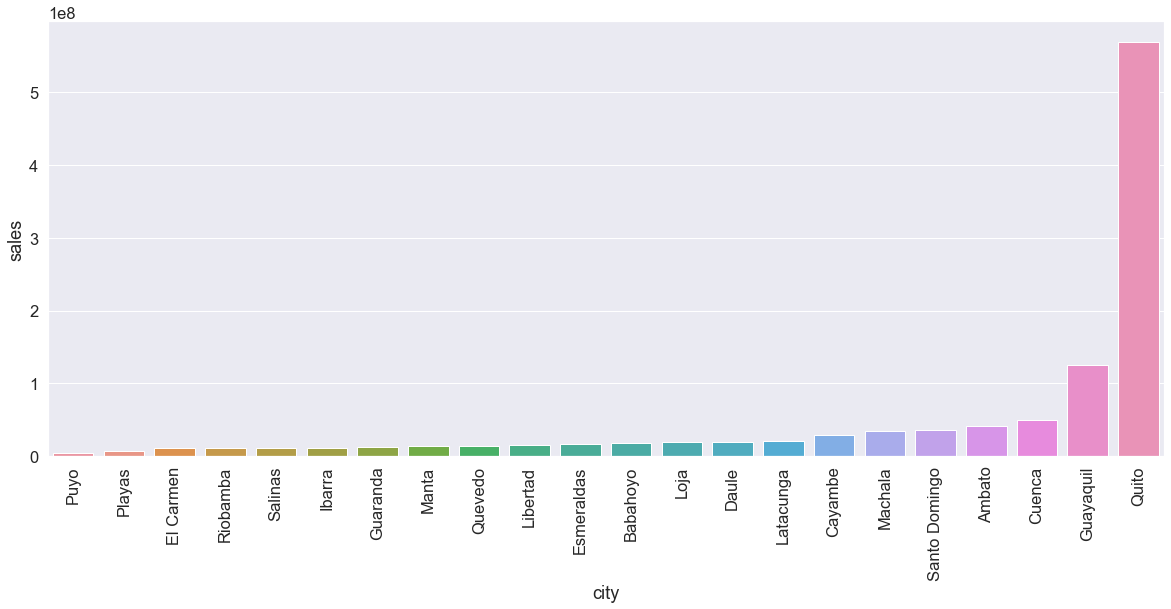

In [68]:
df_reg = df_reg.groupby(["city"])["sales"].agg("sum").sort_values().reset_index()

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)

ax = sns.barplot(y=df_reg["sales"], x=df_reg["city"], order= df_reg["city"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

We can see that Quito is by far the highest selling city

[Text(0, 0, 'Pastaza'),
 Text(1, 0, 'Chimborazo'),
 Text(2, 0, 'Santa Elena'),
 Text(3, 0, 'Imbabura'),
 Text(4, 0, 'Bolivar'),
 Text(5, 0, 'Esmeraldas'),
 Text(6, 0, 'Loja'),
 Text(7, 0, 'Cotopaxi'),
 Text(8, 0, 'Manabi'),
 Text(9, 0, 'Los Rios'),
 Text(10, 0, 'El Oro'),
 Text(11, 0, 'Santo Domingo de los Tsachilas'),
 Text(12, 0, 'Tungurahua'),
 Text(13, 0, 'Azuay'),
 Text(14, 0, 'Guayas'),
 Text(15, 0, 'Pichincha')]

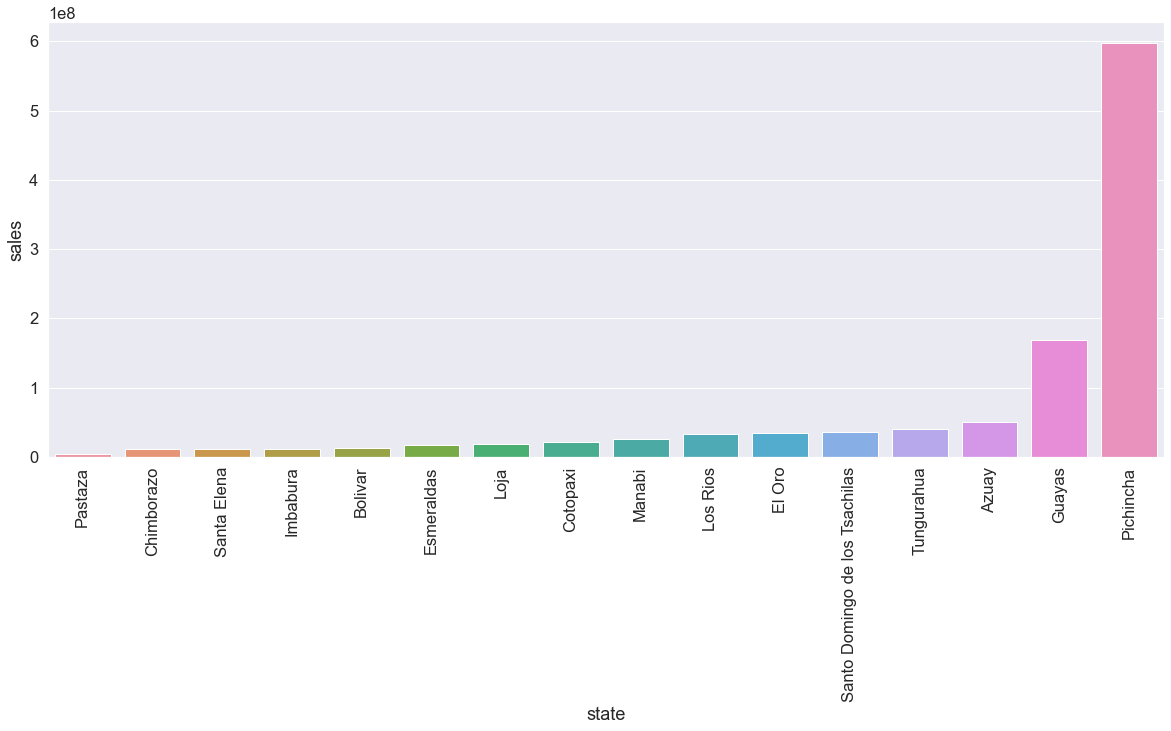

In [69]:
df_stat = df_train[["sales","state"]]

df_stat = df_stat.groupby(["state"])["sales"].agg("sum").sort_values().reset_index()

plt.figure(figsize = (20,8))
sns.set(font_scale = 1.5)

ax = sns.barplot(y=df_stat["sales"], x=df_stat["state"], order= df_stat["state"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Similarly, Pichincha is the highest selling state. 

#### Data Exploration - By Dates

In [70]:
df_train[df_train["city"] == "Cuenca"]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred
990,990,2013-01-01,37,AUTOMOTIVE,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,National,Ecuador,Primer dia del ano,False
991,991,2013-01-01,37,BABY CARE,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,National,Ecuador,Primer dia del ano,False
992,992,2013-01-01,37,BEAUTY,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,National,Ecuador,Primer dia del ano,False
993,993,2013-01-01,37,BEVERAGES,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,National,Ecuador,Primer dia del ano,False
994,994,2013-01-01,37,BOOKS,0.0,0,93.14,Cuenca,Azuay,D,2,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082294,3028834,2017-08-31,42,POULTRY,NaN,0,47.26,Cuenca,Azuay,D,2,Work Day,No Holiday,No Holiday,No Holiday,False
3082295,3028835,2017-08-31,42,PREPARED FOODS,NaN,0,47.26,Cuenca,Azuay,D,2,Work Day,No Holiday,No Holiday,No Holiday,False
3082296,3028836,2017-08-31,42,PRODUCE,NaN,1,47.26,Cuenca,Azuay,D,2,Work Day,No Holiday,No Holiday,No Holiday,False
3082297,3028837,2017-08-31,42,SCHOOL AND OFFICE SUPPLIES,NaN,0,47.26,Cuenca,Azuay,D,2,Work Day,No Holiday,No Holiday,No Holiday,False


In [71]:
df_stores[df_stores["city"] == "Cuenca"]

,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
38,39,Cuenca,Azuay,B,6
41,42,Cuenca,Azuay,D,2


In [72]:
df_holidays[df_holidays["date"] == "2013-01-01"]

,date,type,locale,locale_name,description,transferred
41,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False


In [73]:
df_holidays[df_holidays["type"] == "Transfer"]

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [74]:
for feature in df_train.select_dtypes(include = "category").columns:
    plt.figure(figsize = (15,8))
    sns.set(font_scale = 1.5)
    ax = sns.countplot(x = df_train[feature])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Feature Engineering

### Holidays

We need to be able to distinguish whether on a given date was actually a holiday in that specific city or not

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
 7   city         object        
 8   state        object        
 9   store_type   object        
 10  cluster      int64         
 11  day_type     object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 379.3+ MB


In [76]:
df_train["comp_city"] = np.where(df_train["city"] == df_train["locale_name"], True, False)

df_train["comp_state"] = np.where(df_train["state"] == df_train["locale_name"], True, False)

In [77]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False


Given the task, we know that there can be three cases in which a holiday is taking place: <br>
<br>
1. We either have a national holiday, that is not a transferred day and it is taking place as any of the types that are a holiday <br>
<br>
2. We either have a local holiday, that is not a transferred day, where city and locale_name match and it is taking place as any of the types that are a holiday <br>
<br>
3. We either have a regional holiday, that is not a transferred day, where state and locale_name match and it is taking place as any of the types that are a holiday <br>
<br>
We use that knowledge to transfer it into the function below to feature engineer the boolean column holiday

In [78]:
df_holidays["type"].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [79]:
def holiday(day_type, locale, comp_city, comp_state, transfer):
    '''Function used to populate the vacation column'''
    
    vacation_types = ["Transfer", "Additional", "Bridge", "Event", "Holiday"]
    
    # national vacation day without transfer
    if locale == "National" and transfer == False and day_type in vacation_types:
        return True
    
    # local vacation day without transfer
    elif locale == "Local" and transfer == False and comp_city == True and day_type in vacation_types:
        return True
    
    # regional vacation day without transfer
    elif locale == "Regional" and transfer == False and comp_state == True and day_type in vacation_types:
        return True
    
    # no vacation day
    else:
        return False 

In [80]:
df_train["holidays"] = df_train.apply(lambda x: holiday(x["day_type"], 
                                        x["locale"], 
                                        x["comp_city"], 
                                        x["comp_state"], 
                                        x["transferred"]), 
                                axis = 1)

In [81]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True


We might also reveal some more detailed information, which is the type of holidays that are available. Since so far we only represent whether there is a holiday or not, we could change it to also represent whether the holiday is local or global. 

In [82]:
df_train["holiday_type"] = df_train.apply(lambda x: x["locale"] if x["holidays"] == True else "No Holidays", axis = 1)

In [83]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National


### Pay Dates 

We will now feature engineer the column on which day the wages are being paid in Ecuador

In [84]:
df_train["date"] = pd.to_datetime(df_train["date"])

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 20 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   dcoilwtico    float64       
 7   city          object        
 8   state         object        
 9   store_type    object        
 10  cluster       int64         
 11  day_type      object        
 12  locale        object        
 13  locale_name   object        
 14  description   object        
 15  transferred   bool          
 16  comp_city     bool          
 17  comp_state    bool          
 18  holidays      bool          
 19  holiday_type  object        
dtypes: bool(4), datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 411.6+ MB


In [86]:
dates = pd.DatetimeIndex(df_train["date"]).unique()

In [87]:
pay_days = [day for day in dates if day.day == 15 or day.day == calendar.monthrange(day.year, day.month)[1]]

In [88]:
def pay_day(pay_days, date):
    
    if date in pay_days:
        return True
    else:
        return False

In [89]:
df_train["pay_day"] = df_train.apply(lambda x: pay_day(pay_days, x["date"]), axis = 1)

In [90]:
df_train[df_train["date"] == "2015-08-15"].head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day
1724976,1700028,2015-08-15,1,AUTOMOTIVE,3.0,0,41.93,Quito,Pichincha,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,False,False,False,No Holidays,True
1724977,1700029,2015-08-15,1,BABY CARE,0.0,0,41.93,Quito,Pichincha,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,False,False,False,No Holidays,True
1724978,1700030,2015-08-15,1,BEAUTY,0.0,0,41.93,Quito,Pichincha,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,False,False,False,No Holidays,True
1724979,1700031,2015-08-15,1,BEVERAGES,2845.0,5,41.93,Quito,Pichincha,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,False,False,False,No Holidays,True
1724980,1700032,2015-08-15,1,BOOKS,0.0,0,41.93,Quito,Pichincha,D,13,Holiday,Local,Riobamba,Fundacion de Riobamba,False,False,False,False,No Holidays,True


### Earthquake

We continue by setting a colummn that signifies the entries during which the earthquake took place (assumed for a period of two month)

In [91]:
df_train["state"].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [92]:
epicenter = "Esmeraldas"

df_train[df_train["state"] == epicenter]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day
1221,1221,2013-01-01,43,AUTOMOTIVE,0.0,0,93.14,Esmeraldas,Esmeraldas,E,10,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False
1222,1222,2013-01-01,43,BABY CARE,0.0,0,93.14,Esmeraldas,Esmeraldas,E,10,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False
1223,1223,2013-01-01,43,BEAUTY,0.0,0,93.14,Esmeraldas,Esmeraldas,E,10,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False
1224,1224,2013-01-01,43,BEVERAGES,0.0,0,93.14,Esmeraldas,Esmeraldas,E,10,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False
1225,1225,2013-01-01,43,BOOKS,0.0,0,93.14,Esmeraldas,Esmeraldas,E,10,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082327,3028867,2017-08-31,43,POULTRY,NaN,0,47.26,Esmeraldas,Esmeraldas,E,10,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True
3082328,3028868,2017-08-31,43,PREPARED FOODS,NaN,0,47.26,Esmeraldas,Esmeraldas,E,10,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True
3082329,3028869,2017-08-31,43,PRODUCE,NaN,0,47.26,Esmeraldas,Esmeraldas,E,10,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True
3082330,3028870,2017-08-31,43,SCHOOL AND OFFICE SUPPLIES,NaN,0,47.26,Esmeraldas,Esmeraldas,E,10,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True


In [93]:
earthquake = "2016-04-16"

epicenter = "Esmaraldas"

datelist = pd.date_range(earthquake, periods=90).tolist()

In [94]:
def earthquake(date, datelist):
    
    if date in datelist:
        return True
    else:
        return False

In [95]:
df_train["earthquake"] = df_train.apply(lambda x: earthquake(x["date"], datelist), axis = 1)

In [96]:
df_train[(df_train["date"] >= "2016-04-16") & (df_train["date"] <= "2016-05-16") & (df_train["earthquake"] == True)].head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake
2161566,2134836,2016-04-16,1,AUTOMOTIVE,6.0,0,39.74,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False,False,False,True,National,False,True
2161567,2134837,2016-04-16,1,BABY CARE,0.0,0,39.74,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False,False,False,True,National,False,True
2161568,2134838,2016-04-16,1,BEAUTY,4.0,0,39.74,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False,False,False,True,National,False,True
2161569,2134839,2016-04-16,1,BEVERAGES,2073.0,5,39.74,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False,False,False,True,National,False,True
2161570,2134840,2016-04-16,1,BOOKS,0.0,0,39.74,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi,False,False,False,True,National,False,True


In [97]:
df_train["state"].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

We now might also wanna assess the distance to the epicenter. Despite the fact that this is hardly possible due to missing geolocations, we could use the information of states and look up their closeness to the epicenter. We know the epicenter took place in Esmaraldas. The neighbouring provinces are: "Pichincha", "Imbabura", "Santo Domingo de los Tsachilas", "Manabi". So we could assume that there is some higher impact on the stores during the time of the earthquake in these particular regions. 

For the days that we encoded the earthquake we can thus introduce another feature which assesses the closeness by either 0 = no closeness, or no time of earthquake, 1 = neighbouring region or 2 = epicenter.

In [98]:
def epicenter(earthquake, state):
    
    epicenter = "Esmaraldas"
    
    nei_states = ["Pichincha", "Imbabura", "Santo Domingo de los Tsachilas", "Manabi"]
    
    if earthquake == True and state == epicenter:
        return 2
    elif earthquake == True and state in nei_states:
        return 1
    else:
        return 0 

In [99]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False


In [100]:
df_train["epicenter"] = df_train.apply(lambda x: epicenter(x["earthquake"], x["state"]), axis = 1)

In [101]:
df_train[(df_train["date"] >= "2016-04-16") & (df_train["date"] >= "2016-05-16")]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter
2223936,2188296,2016-05-16,1,AUTOMOTIVE,13.0,0,47.72,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi+30,False,False,False,True,National,False,True,1
2223937,2188297,2016-05-16,1,BABY CARE,0.0,0,47.72,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi+30,False,False,False,True,National,False,True,1
2223938,2188298,2016-05-16,1,BEAUTY,4.0,0,47.72,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi+30,False,False,False,True,National,False,True,1
2223939,2188299,2016-05-16,1,BEVERAGES,2342.0,17,47.72,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi+30,False,False,False,True,National,False,True,1
2223940,2188300,2016-05-16,1,BOOKS,0.0,0,47.72,Quito,Pichincha,D,13,Event,National,Ecuador,Terremoto Manabi+30,False,False,False,True,National,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True,False,0
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True,False,0
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True,False,0
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,6,Work Day,No Holiday,No Holiday,No Holiday,False,False,False,False,No Holidays,True,False,0


### First Vacation Days

Lastly, we might want to test another notion. Since people might be more prone to celebrate in the first few days of vacations, last day before official vacations, and first vacation day, stores might observe higher sales. We can test this assumption by introducing a variable that records the official holiday start and the day before.

In [102]:
df_vacation = (df_train[["date", "holidays"]]
               .groupby('date')
               .apply(lambda x: x[x == True].count())
               .apply(lambda x: True if x["holidays"] > 0 else False, axis = 1)
               .reset_index()
               .rename(columns={0:"holiday"}))

In [103]:
df_vacation.head(5)

,date,holiday
0,2013-01-01,True
1,2013-01-02,False
2,2013-01-03,False
3,2013-01-04,False
4,2013-01-05,False


Now that we have the information on which date holidays took place or not, we can instantiate a function by using a lead/lag of the holidays column

In [104]:
def first_vacation_days(holiday, holiday_shift_front):
    
    if holiday == True and holiday_shift_front != True:
        return True
    
    else:
        return False

In [105]:
df_vacation["holiday_shift_front"] = df_vacation["holiday"].shift(1)

df_vacation.head()

,date,holiday,holiday_shift_front
0,2013-01-01,True,NaN
1,2013-01-02,False,True
2,2013-01-03,False,False
3,2013-01-04,False,False
4,2013-01-05,False,False


In [106]:
df_vacation["first_holiday_days"] = df_vacation.apply(lambda x: first_vacation_days(x["holiday"], x["holiday_shift_front"]), axis = 1)

In [107]:
df_vacation[df_vacation["first_holiday_days"] == True]

,date,holiday,holiday_shift_front,first_holiday_days
0,2013-01-01,True,NaN,True
41,2013-02-11,True,False,True
60,2013-03-02,True,False,True
90,2013-04-01,True,False,True
101,2013-04-12,True,False,True
...,...,...,...,...
1660,2017-07-23,True,False,True
1673,2017-08-05,True,False,True
1679,2017-08-11,True,False,True
1683,2017-08-15,True,False,True


In [108]:
df_vacation[(df_vacation["date"] >= "2013-02-09") & (df_vacation["date"] <= "2013-02-12")]

,date,holiday,holiday_shift_front,first_holiday_days
39,2013-02-09,False,False,False
40,2013-02-10,False,False,False
41,2013-02-11,True,False,True
42,2013-02-12,True,True,False


A quick check reveals that our implementation was succesful. Now we have to merge the data back with our initial dataframe.

In [109]:
df_train = df_train.merge(df_vacation[["date","first_holiday_days"]], how="left", on="date")

In [110]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter,first_holiday_days
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True


In [111]:
df_train[(df_train["holidays"] == False) & (df_train["first_holiday_days"] == True)]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter,first_holiday_days
106920,106920,2013-03-02,1,AUTOMOTIVE,1.0,0,90.13,Quito,Pichincha,D,13,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,No Holidays,False,False,0,True
106921,106921,2013-03-02,1,BABY CARE,0.0,0,90.13,Quito,Pichincha,D,13,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,No Holidays,False,False,0,True
106922,106922,2013-03-02,1,BEAUTY,0.0,0,90.13,Quito,Pichincha,D,13,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,No Holidays,False,False,0,True
106923,106923,2013-03-02,1,BEVERAGES,1221.0,0,90.13,Quito,Pichincha,D,13,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,No Holidays,False,False,0,True
106924,106924,2013-03-02,1,BOOKS,0.0,0,90.13,Quito,Pichincha,D,13,Holiday,Local,Manta,Fundacion de Manta,False,False,False,False,No Holidays,False,False,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070381,3016921,2017-08-24,9,POULTRY,NaN,0,47.24,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,False,False,False,No Holidays,False,False,0,True
3070382,3016922,2017-08-24,9,PREPARED FOODS,NaN,0,47.24,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,False,False,False,No Holidays,False,False,0,True
3070383,3016923,2017-08-24,9,PRODUCE,NaN,3,47.24,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,False,False,False,No Holidays,False,False,0,True
3070384,3016924,2017-08-24,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.24,Quito,Pichincha,B,6,Holiday,Local,Ambato,Fundacion de Ambato,False,False,False,False,No Holidays,False,False,0,True


Now that we have succesfully joined back the data, we need to make some slight adjustments, since we again need to separate the days that are actually holidays in the region and the ones that are not. The tricky part is that it easy to identify the days on which there was an actual holiday in the city and whether it was the first day of vacations (both need to be true). However, since we also want to take the last daybefore the holidays in account, we somehow need to be able to generate this information.

In [112]:
df_train["first_holidays_true"] = df_train.apply(lambda x: True if x["holidays"] == True and x["first_holiday_days"] == True else False, axis = 1)

In [113]:
df_train[(df_train["holidays"] == False) & (df_train["first_holidays_true"] == True)]

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter,first_holiday_days,first_holidays_true


## Final Preprocessing & Modification of Test Data

In [114]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter,first_holiday_days,first_holidays_true
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True


We will continue to investigate the distinct values within each feature to decide to drop the ones that have to many unique values.

In [115]:
distinct_values = df_train.nunique().sort_values()

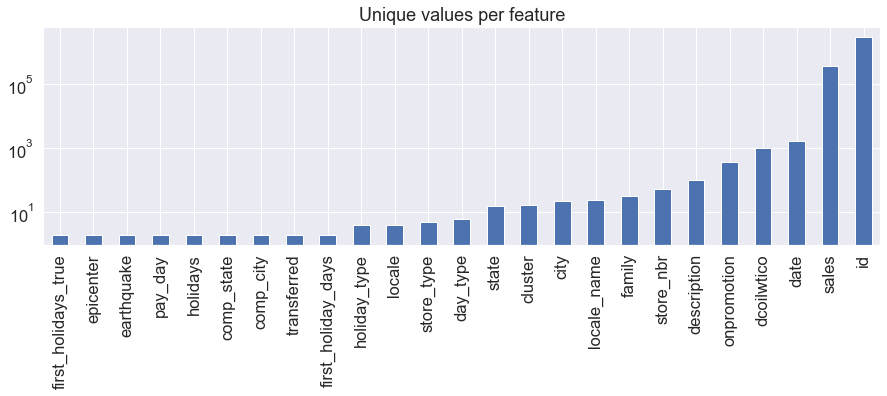

In [116]:
distinct_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

As expected, we can observe that ID, sales, date and the continous values of oilprices and onpromotion have the most distinct values. <br>
Let us know explore the correlations between the features

In [117]:
df_corr = df_train.corr(method="pearson")

In [118]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

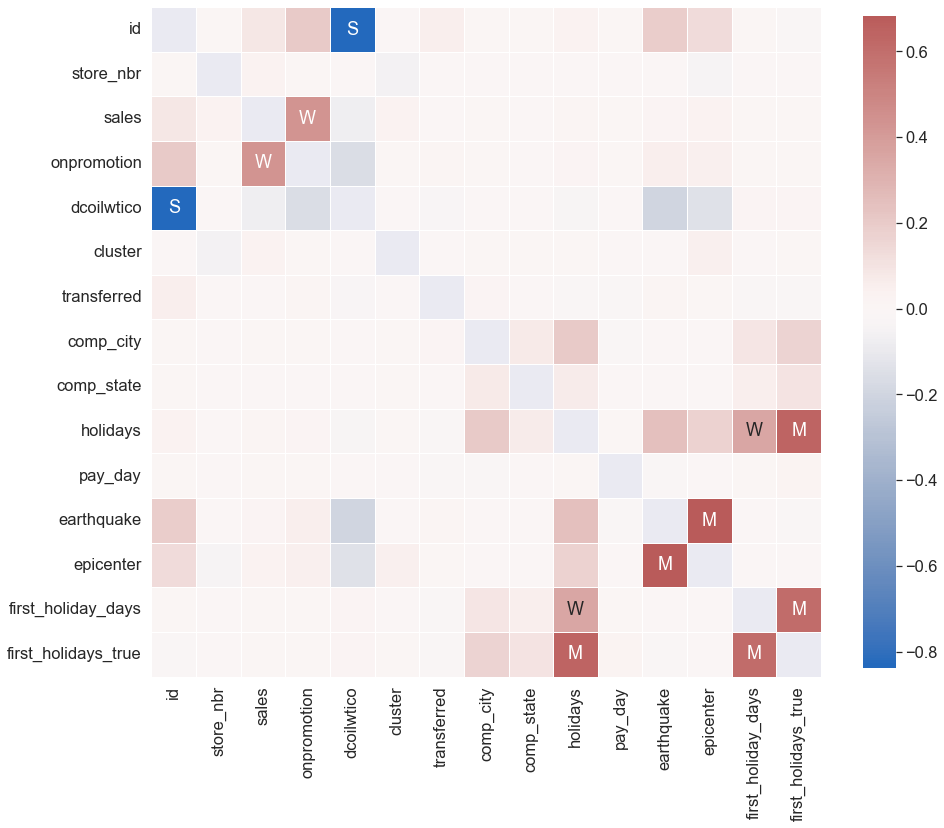

In [119]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

As we can observe we seem to have two interesting, but logical medium correlations between first_holidays true and first_holidays and first_holidays_true and hoolidays (which is obvious since one is a subset of the other). In addition we also have a medium correlation between earthquake and epicenter which comes as no surprise. The correlation between the oil price and the id seems to be a due to random chance, which wont be relevant later as we will drop it.

## Modeling

Regarding the models for predicting continuous sales prices, we will try the following models: <br>
<br>
- multiple linear regression <br>
- shrinkage methods <br>
- random forests <br>
- boosting <br>

For the first two tasks, however, we require dummy encoding the features. For the latter two we require the encoding of categorical variables into numbers.

### Linear Models

At first we drop the columns that aren't further required as a feature for the model: <br>
- date <br>
- transferred <br>
- comp_city <br>
- comp_state <br>
- first_holiday_days

In [120]:
df_linear  = df_train.drop(columns = ["date", "transferred", "comp_city", "comp_state", "first_holiday_days"]).set_index("id")

In [121]:
df_linear.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,epicenter,first_holidays_true
id,,,,,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True


Given the succesful implementation, we continue to have a look at all variables to encode these with the correct datatypes. The only features that should remain as numeric ones are: <br>
- sales <br>
- onpromotion <br>
- dcoilwtico <br>
- epicenter

In [122]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3029399
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   store_nbr            int64  
 1   family               object 
 2   sales                float64
 3   onpromotion          int64  
 4   dcoilwtico           float64
 5   city                 object 
 6   state                object 
 7   store_type           object 
 8   cluster              int64  
 9   day_type             object 
 10  locale               object 
 11  locale_name          object 
 12  description          object 
 13  holidays             bool   
 14  holiday_type         object 
 15  pay_day              bool   
 16  earthquake           bool   
 17  epicenter            int64  
 18  first_holidays_true  bool   
dtypes: bool(4), float64(2), int64(4), object(9)
memory usage: 388.1+ MB


Given the view of datatypes, we have to first change the following numbers: <br>
- store_nbr <br>
- cluster <br>

In [123]:
df_linear[["store_nbr", "cluster"]] = df_linear[["store_nbr", "cluster"]].astype("object")

In [124]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3029399
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   store_nbr            object 
 1   family               object 
 2   sales                float64
 3   onpromotion          int64  
 4   dcoilwtico           float64
 5   city                 object 
 6   state                object 
 7   store_type           object 
 8   cluster              object 
 9   day_type             object 
 10  locale               object 
 11  locale_name          object 
 12  description          object 
 13  holidays             bool   
 14  holiday_type         object 
 15  pay_day              bool   
 16  earthquake           bool   
 17  epicenter            int64  
 18  first_holidays_true  bool   
dtypes: bool(4), float64(2), int64(2), object(11)
memory usage: 388.1+ MB


Given the succesful implementation, we continue to exclude all numerical features and convert them into dummy encoded variables.

In [125]:
df_lin_cat = df_linear.select_dtypes(exclude="number")

In [126]:
df_lin_cat.head()

,store_nbr,family,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,first_holidays_true
id,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
1,1,BABY CARE,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
2,1,BEAUTY,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
3,1,BEVERAGES,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
4,1,BOOKS,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True


In [127]:
df_lin_cat.columns

Index(['store_nbr', 'family', 'city', 'state', 'store_type', 'cluster',
       'day_type', 'locale', 'locale_name', 'description', 'holidays',
       'holiday_type', 'pay_day', 'earthquake', 'first_holidays_true'],
      dtype='object')

In [128]:
df_dummy = pd.get_dummies(df_lin_cat, drop_first = True)

In [129]:
df_dummy.head()

,holidays,pay_day,earthquake,first_holidays_true,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,store_type_B,store_type_C,store_type_D,store_type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,day_type_Bridge,day_type_Event,day_type_Holiday,day_type_Transfer,day_type_Work Day,locale_National,locale_No Holiday,locale_Regional,locale_name_Cayambe,locale_name_Cotopaxi,locale_name_Cuenca,locale_name_Ecuador,locale_name_El Carmen,locale_name_Esmeraldas,locale_name_Guaranda,locale_name_Guayaquil,locale_name_Ibarra,locale_name_Imbabura,locale_name_Latacunga,locale_name_Libertad,locale_name_Loja,locale_name_Machala,locale_name_Manta,locale_name_No Holiday,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,description_Black Friday,description_Cantonizacion de Cayambe,description_Cantonizacion de El Carmen,description_Cantonizacion de Guaranda,description_Cantonizacion de Latacunga,description_Cantonizacion de Libertad,description_Cantonizacion de Quevedo,description_Cantonizacion de Riobamba,description_Cantonizacion de Salinas,description_Cantonizacion del Puyo,description_Carnaval,description_Cyber Monday,description_Dia de Difuntos,description_Dia de la Madre,description_Dia de la Madre-1,description_Dia del Trabajo,description_Fundacion de Ambato,description_Fundacion de Cuenca,description_Fundacion de Esmeraldas,description_Fundacion de Guayaquil,description_Fundacion de Guayaquil-1,description_Fundacion de Ibarra,description_Fundacion de Loja,description_Fundacion de Machala,description_Fundacion de Manta,description_Fundacion de Quito,description_Fundacion de Quito-1,description_Fundacion de Riobamba,description_Fundacion de Santo Domingo,description_Inauguracion Mundial de futbol Brasil,description_Independencia de Ambato,description_Independencia de Cuenca,description_Independencia de Guaranda,description_Independencia de Guayaquil,description_Independencia de Latacunga,description_Mundial de futbol Brasil: Cuartos de Final,description_Mundial de

Given the succesful implementation, we now join the categorical data back with the numerical ones and drop the non-dummy encoded categoricla features before.

In [130]:
df_linear.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,epicenter,first_holidays_true
id,,,,,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True


In [131]:
cat_drop = list(df_linear.select_dtypes(exclude="number").columns)

df_linear.drop(cat_drop, axis = 1, inplace = True)

In [132]:
df_linear.head()

,sales,onpromotion,dcoilwtico,epicenter
id,,,,
0,0.0,0,93.14,0
1,0.0,0,93.14,0
2,0.0,0,93.14,0
3,0.0,0,93.14,0
4,0.0,0,93.14,0


In [133]:
df_linear_dummy = pd.concat([df_linear, df_dummy], axis = 1)

In [134]:
df_linear_dummy.head()

,sales,onpromotion,dcoilwtico,epicenter,holidays,pay_day,earthquake,first_holidays_true,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,store_nbr_19,store_nbr_20,store_nbr_21,store_nbr_22,store_nbr_23,store_nbr_24,store_nbr_25,store_nbr_26,store_nbr_27,store_nbr_28,store_nbr_29,store_nbr_30,store_nbr_31,store_nbr_32,store_nbr_33,store_nbr_34,store_nbr_35,store_nbr_36,store_nbr_37,store_nbr_38,store_nbr_39,store_nbr_40,store_nbr_41,store_nbr_42,store_nbr_43,store_nbr_44,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,city_Latacunga,city_Libertad,city_Loja,city_Machala,city_Manta,city_Playas,city_Puyo,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,state_Bolivar,state_Chimborazo,state_Cotopaxi,state_El Oro,state_Esmeraldas,state_Guayas,state_Imbabura,state_Loja,state_Los Rios,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,store_type_B,store_type_C,store_type_D,store_type_E,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,day_type_Bridge,day_type_Event,day_type_Holiday,day_type_Transfer,day_type_Work Day,locale_National,locale_No Holiday,locale_Regional,locale_name_Cayambe,locale_name_Cotopaxi,locale_name_Cuenca,locale_name_Ecuador,locale_name_El Carmen,locale_name_Esmeraldas,locale_name_Guaranda,locale_name_Guayaquil,locale_name_Ibarra,locale_name_Imbabura,locale_name_Latacunga,locale_name_Libertad,locale_name_Loja,locale_name_Machala,locale_name_Manta,locale_name_No Holiday,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,description_Black Friday,description_Cantonizacion de Cayambe,description_Cantonizacion de El Carmen,description_Cantonizacion de Guaranda,description_Cantonizacion de Latacunga,description_Cantonizacion de Libertad,description_Cantonizacion de Quevedo,description_Cantonizacion de Riobamba,description_Cantonizacion de Salinas,description_Cantonizacion del Puyo,description_Carnaval,description_Cyber Monday,description_Dia de Difuntos,description_Dia de la Madre,description_Dia de la Madre-1,description_Dia del Trabajo,description_Fundacion de Ambato,description_Fundacion de Cuenca,description_Fundacion de Esmeraldas,description_Fundacion de Guayaquil,description_Fundacion de Guayaquil-1,description_Fundacion de Ibarra,description_Fundacion de Loja,description_Fundacion de Machala,description_Fundacion de Manta,description_Fundacion de Quito,description_Fundacion de Quito-1,description_Fundacion de Riobamba,description_Fundacion de Santo Domingo,description_Inauguracion Mundial de futbol Brasil,description_Independencia de Ambato,description_Independencia de Cuenca,description_Independencia de Guaranda,description_Independencia de Guayaquil,description_Independencia de Latacunga,description_Mundial de futbol Brasil: 

Now that we have succesfully joined the data back together, we continue by seperaating the test from the training data, which is given by the nans in sales.

In [135]:
df_linear_dummy.shape

(3082860, 285)

In [136]:
df_linear_test = df_linear_dummy[df_linear_dummy["sales"].isna()]

In [137]:
df_linear_test.shape

(28512, 285)

In [138]:
df_test.shape

(28512, 6)

In [139]:
df_linear_train = df_linear_dummy[df_linear_dummy["sales"].notna()]

In [140]:
df_linear_train.shape

(3054348, 285)

In [141]:
df_linear_dummy.shape[0] - (df_linear_test.shape[0] + df_linear_train.shape[0])

0

Our test reveals that the subsetting was succesful, we are thus ready for starting our modeling using the given data! <br>
We continue by implementing a train-test split with 30/70 of the training data to evaluate the accuracy of our models, before applying it to the final test data for the results.

In [142]:
X_lin = df_linear_train.drop("sales", axis = 1)
y_lin = df_linear_train["sales"]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.30, random_state=42)

#### Multiple Linear Regression

In [144]:
# we instantiate our model 

lin_reg = LinearRegression()

In [145]:
# we fit the model to the data

lin_reg.fit(X_train, y_train)

LinearRegression()

In [146]:
lin_reg.predict(X_test)

array([ 372.234375  ,  -67.171875  ,  524.8671875 , ...,  246.9609375 ,
        299.15234375, -149.13671875])

In [147]:
print(f"The R^2 of our model on the test data is: {lin_reg.score(X_test, y_test)}")

The R^2 of our model on the test data is: 0.5846273642913894


#### Shrinkage Methods: Ridge/Lasso 

In [148]:
# we instantiate our model

lasso_reg = Lasso()

In [149]:
# we fit the model to the data

lasso_reg.fit(X_train, y_train)

Lasso()

In [150]:
lasso_reg.predict(X_test)

array([350.09463769,  87.46148323, 507.57989306, ..., 160.97590609,
       308.74471916, -62.92856417])

In [151]:
print(f"The R^2 of our model on the test data is: {lasso_reg.score(X_test, y_test)}")

The R^2 of our model on the test data is: 0.581415595080837


We saw that the multiple linear regression performed slightly better than the lasso, we will keep that in mind and continue with the ensemble methods.

### Non-linear methods

Regarding the nonlinear methods, no dummy encoded variables are required, however, we need to coerce the categorical data to numbers.

In [152]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,transferred,comp_city,comp_state,holidays,holiday_type,pay_day,earthquake,epicenter,first_holiday_days,first_holidays_true
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,False,False,True,National,False,False,0,True,True


In [153]:
df_non_linear  = df_train.drop(columns = ["date", "transferred", "comp_city", "comp_state", "first_holiday_days"]).set_index("id")

In [154]:
df_non_linear[["store_nbr", "cluster"]] = df_non_linear[["store_nbr", "cluster"]].astype("object")

In [155]:
df_non_linear.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,epicenter,first_holidays_true
id,,,,,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True


In [156]:
df_non_lin_cat =  df_non_linear.select_dtypes(exclude="number")

In [157]:
df_non_lin_cat.head()

,store_nbr,family,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,first_holidays_true
id,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
1,1,BABY CARE,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
2,1,BEAUTY,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
3,1,BEVERAGES,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True
4,1,BOOKS,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,True


In [158]:
# we instantiate the label encoder

le = preprocessing.LabelEncoder()

In [159]:
fit = df_non_lin_cat.apply(le.fit_transform)

In [160]:
fit.head()


,store_nbr,family,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,first_holidays_true
id,,,,,,,,,,,,,,,
0,0,0,18,12,3,12,3,1,4,51,1,1,0,0,1
1,0,1,18,12,3,12,3,1,4,51,1,1,0,0,1
2,0,2,18,12,3,12,3,1,4,51,1,1,0,0,1
3,0,3,18,12,3,12,3,1,4,51,1,1,0,0,1
4,0,4,18,12,3,12,3,1,4,51,1,1,0,0,1


Given the succesful implementation, we now join the data back with the non-categorical features to attain our final dataframe.

In [161]:
df_non_linear.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,epicenter,first_holidays_true
id,,,,,,,,,,,,,,,,,,,
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,True,National,False,False,0,True


In [162]:
df_non_linear.drop(df_non_linear.select_dtypes(exclude = "number").columns, axis = 1,inplace=True)

In [163]:
df_non_linear_label = pd.concat([df_non_linear, fit], axis = 1)

In [164]:
df_non_linear_label.head()

,sales,onpromotion,dcoilwtico,epicenter,store_nbr,family,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,first_holidays_true
id,,,,,,,,,,,,,,,,,,,
0,0.0,0,93.14,0,0,0,18,12,3,12,3,1,4,51,1,1,0,0,1
1,0.0,0,93.14,0,0,1,18,12,3,12,3,1,4,51,1,1,0,0,1
2,0.0,0,93.14,0,0,2,18,12,3,12,3,1,4,51,1,1,0,0,1
3,0.0,0,93.14,0,0,3,18,12,3,12,3,1,4,51,1,1,0,0,1
4,0.0,0,93.14,0,0,4,18,12,3,12,3,1,4,51,1,1,0,0,1


In [165]:
df_non_linear_label.shape

(3082860, 19)

In [166]:
df_non_linear_test = df_non_linear_label[df_non_linear_label["sales"].isna()]

In [167]:
df_non_linear_test.shape

(28512, 19)

In [168]:
df_test.shape

(28512, 6)

In [169]:
df_non_linear_train = df_non_linear_label[df_non_linear_label["sales"].notna()]

In [170]:
df_non_linear_train.shape

(3054348, 19)

In [171]:
df_non_linear_label.shape[0] - (df_non_linear_test.shape[0] + df_non_linear_train.shape[0])

0

We are now ready to start modeling the non-linear models! At first, however, we also perform a train_test_split.

In [172]:
X_non_lin = df_non_linear_train.drop("sales", axis = 1)
y_non_lin = df_non_linear_train["sales"]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_non_lin, y_non_lin, test_size=0.30, random_state=42)

#### Random Forests

In [174]:
# we instantiate the random forest

rf = RandomForestRegressor()

In [175]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [176]:
rf.predict(X_test)

array([487.12333333,   3.73      ,   1.23266667, ..., 151.62201336,
       429.70282634,   0.        ])

In [177]:
print(f"The accuracy of the random forest is {rf.score(X_test, y_test)}")

The accuracy of the random forest is 0.8674175245404385


As we can observe, the random forest already drastically improves our accuracy

#### Boosting

In [178]:
# we instantiate the last model; gradientboosting

gb = GradientBoostingRegressor()

In [179]:
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [180]:
gb.predict(X_test)

array([368.31731484,  42.2092786 , 213.97824131, ..., 380.5583373 ,
       243.71772485,  89.04888668])

In [181]:
print(f"The accuracy of the random forest is {gb.score(X_test, y_test)}")

The accuracy of the random forest is 0.6999003683871053


As evident from both models, we could see that the random forest performed the best and as such will be used as a final model. <br>
Since the random forest was assessed on a hold out set from the actual training data, we can use the rest of the data for training the model, before fitting it to the final test set of Kaggle and submitting the results. To prevent overfitting, however, we will use a grid search with cross validation. 

### Final Model 

In [182]:
# instantiate final model

rf_final = RandomForestRegressor()

In [183]:
params = {"min_samples_split":np.arange(2,4,1)}

gs_rf = GridSearchCV(rf_final, param_grid={"min_samples_split":np.arange(2,4,1)}, cv=5)

In [186]:
rf_final = RandomForestRegressor()

In [187]:
rf_final.fit(X_non_lin, y_non_lin)

RandomForestRegressor()

Now that we have our final model fitted, we will use it to predict on our test data.

In [189]:
df_non_linear_test = df_non_linear_test.drop("sales", axis = 1)

In [190]:
df_non_linear_test

,onpromotion,dcoilwtico,epicenter,store_nbr,family,city,state,store_type,cluster,day_type,locale,locale_name,description,holidays,holiday_type,pay_day,earthquake,first_holidays_true
id,,,,,,,,,,,,,,,,,,
3000888,0,46.80,0,0,0,18,12,3,12,5,2,16,49,0,2,0,0,0
3000889,0,46.80,0,0,1,18,12,3,12,5,2,16,49,0,2,0,0,0
3000890,2,46.80,0,0,2,18,12,3,12,5,2,16,49,0,2,0,0,0
3000891,20,46.80,0,0,3,18,12,3,12,5,2,16,49,0,2,0,0,0
3000892,0,46.80,0,0,4,18,12,3,12,5,2,16,49,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,1,47.26,0,8,28,18,12,1,5,5,2,16,49,0,2,1,0,0
3029396,0,47.26,0,8,29,18,12,1,5,5,2,16,49,0,2,1,0,0
3029397,1,47.26,0,8,30,18,12,1,5,5,2,16,49,0,2,1,0,0


In [191]:
pred_results = rf_final.predict(df_non_linear_test)

In [192]:
pred_df = pd.DataFrame(pred_results, index=df_test.index, columns=["sales"])
pred_df.to_csv('sales_ecuador_results.csv', header=True, index_label='Id')
print(pred_df)

             sales
0         2.501000
1         0.000000
2         6.188667
3      2033.856333
4         0.000000
...            ...
28507   454.166800
28508   101.794520
28509  1208.653957
28510    91.630000
28511    10.959996

[28512 rows x 1 columns]
